In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import musicalrobot

In [2]:
# sys.path.insert(0, '../musicalrobot/')

In [3]:
from musicalrobot import irtemp
from musicalrobot import edge_detection as ed
from musicalrobot import pixel_analysis as pa
from musicalrobot import data_encoding as de

Using TensorFlow backend.


In [4]:
%matplotlib inline

In [5]:
# Inputting the video as a stack of arrays
frames = ed.input_file('../musicalrobot/data/10_17_19_PPA_Shallow_plate.tiff')

In [6]:
len(frames)

887

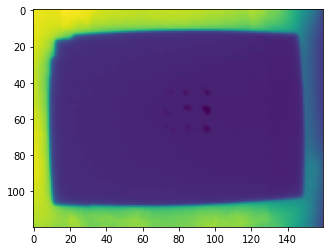

In [7]:
plt.imshow(frames[515])

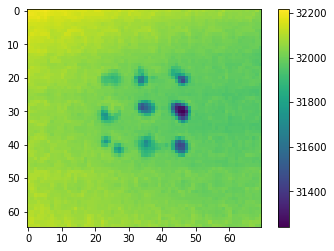

In [8]:
# Cropping all the frames in the video
crop_frame = []
for frame in frames:
    crop_frame.append(frame[25:90,50:120])
plt.imshow(crop_frame[515])
plt.colorbar()

In [9]:
# Performing Image equalization to determine sample position
img_eq = pa.image_eq(crop_frame)

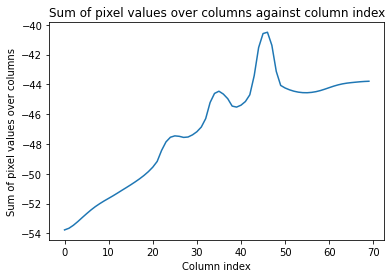

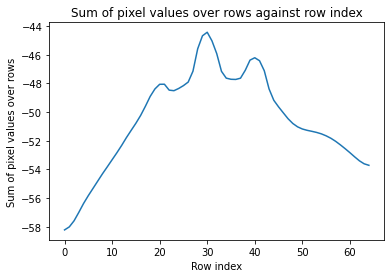

In [10]:
# Determining the sum of pixels in each column and row
column_sum, row_sum = pa.pixel_sum(img_eq)

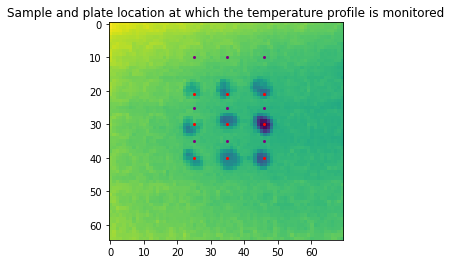

In [11]:
# Determining the plate and sample locations
r_peaks, c_peaks = pa.peak_values(column_sum, row_sum, 3, 3, freeze_heat=False)
sample_location = pa.locations(r_peaks, c_peaks, img_eq)

In [12]:
r_peaks

[21, 30, 40]

In [13]:
c_peaks

[25, 35, 46]

In [14]:
sample_location

,Row,Column,plate_location
0,21,25,10
1,30,25,25
2,40,25,35
3,21,35,10
4,30,35,25
5,40,35,35
6,21,46,10
7,30,46,25
8,40,46,35


In [15]:
# Extracting temperature profiles at all the sample and plate locations
temp, plate_temp = pa.pixel_intensity(sample_location, crop_frame, 'Row', 'Column', 'plate_location')

/Users/shrilakshmisbonageri/miniconda3/envs/image/lib/python3.6/site-packages/musicalrobot/pixel_analysis.py:253: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19
  rr, cc = circle(x[i], y[i], radius = 1)


In [16]:
# Uncomment the following block of code to save the temperature profile of the samples as a pickle
# import pickle
# with open('ppa_temp.pkl','wb') as f:
#     pickle.dump(temp, f)
# Uncomment the following block of code to save the temperature profile data of the plate locations as a pickle
# import pickle
# with open('ppa_plate_temp.pkl','wb') as f:
#     pickle.dump(plate_temp, f)

In [17]:
# Finding inflection temperature
s_peaks, s_infl = ed.peak_detection(temp, plate_temp, 'Sample')

In [18]:
np.asarray(s_infl)[:,0]

array([47.07358994, 46.08467676, 44.95108666, 45.01406028, 44.65370247,
       44.19138207, 44.12452171, 43.11698266, 43.91498001])

In [19]:
result_df = de.final_result(temp, plate_temp, path='../musicalrobot/data/')

Directory  ../musicalrobot/data/noise_images  already exists
Noise images generated
{'noiseless': 0, 'noisy': 1}
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Directory  ../musicalrobot/data/inf_images  already exists
Generated inflection images
{'inf': 0, 'no_inf': 1}


/Users/shrilakshmisbonageri/miniconda3/envs/image/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
result_df

,Sample number,Noise net,Inf net,Melting point
0,0,Noiseless,Inflection,47.0736
1,1,Noiseless,Inflection,46.0847
2,2,Noiseless,Inflection,44.9511
3,3,Noiseless,Inflection,45.0141
4,4,Noiseless,Inflection,44.6537
5,5,Noiseless,Inflection,44.1914
6,6,Noiseless,Inflection,44.1245
7,7,Noiseless,Inflection,43.117
8,8,Noiseless,Inflection,43.915


### Using wrapping function

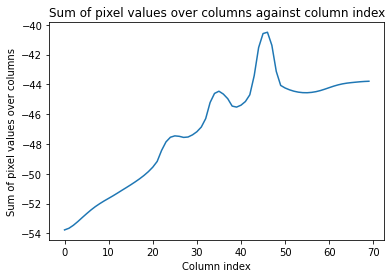

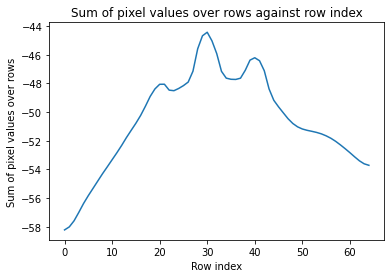

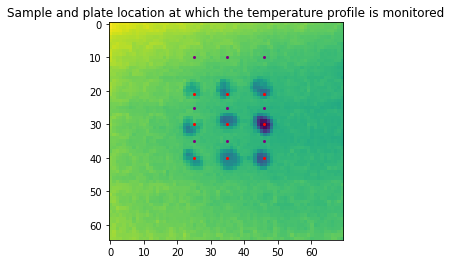

/Users/shrilakshmisbonageri/miniconda3/envs/image/lib/python3.6/site-packages/musicalrobot/pixel_analysis.py:253: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19
  rr, cc = circle(x[i], y[i], radius = 1)


Directory  ../musicalrobot/data/noise_images  already exists
Noise images generated
{'noiseless': 0, 'noisy': 1}
Directory  ../musicalrobot/data/inf_images  already exists
Generated inflection images
{'inf': 0, 'no_inf': 1}


/Users/shrilakshmisbonageri/miniconda3/envs/image/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
result_df1 = pa.pixel_temp(crop_frame,n_columns = 3, n_rows = 3, freeze_heat=False, path='../musicalrobot/data/')

In [22]:
result_df1

,Sample number,Noise net,Inf net,Melting point
0,0,Noiseless,Inflection,47.0736
1,1,Noiseless,Inflection,46.0847
2,2,Noiseless,Inflection,44.9511
3,3,Noiseless,Inflection,45.0141
4,4,Noiseless,Inflection,44.6537
5,5,Noiseless,Inflection,44.1914
6,6,Noiseless,Inflection,44.1245
7,7,Noiseless,Inflection,43.117
8,8,Noiseless,Inflection,43.915


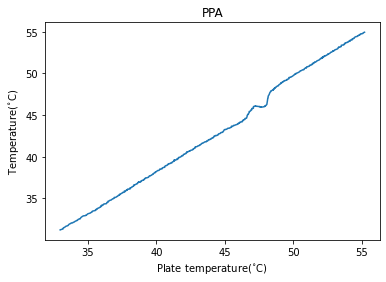

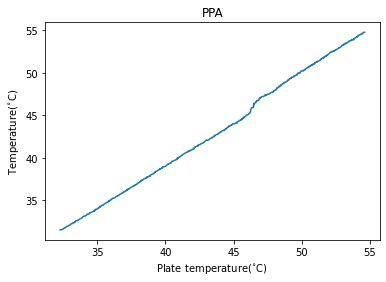

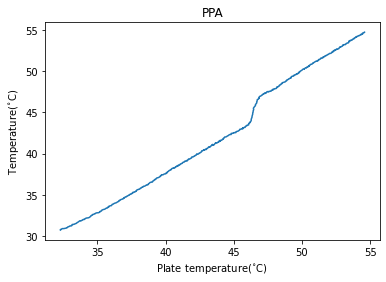

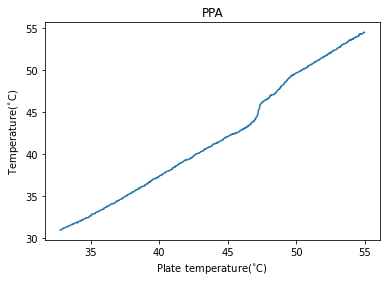

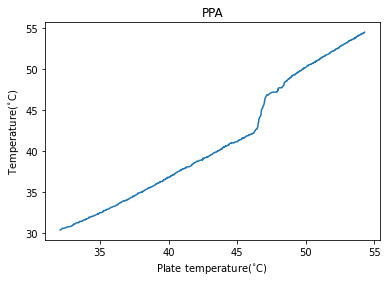

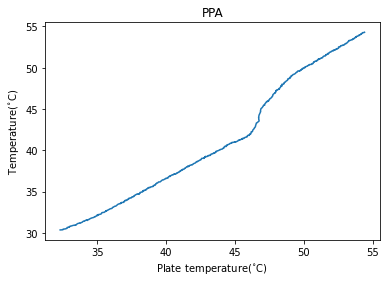

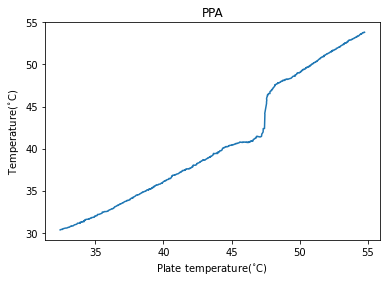

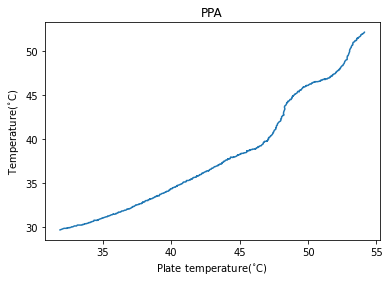

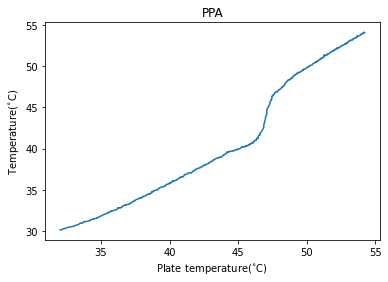

In [23]:
# Plotting temperature profiles
for i in range(len(temp)):
    plt.plot(plate_temp[i], temp[i])
    plt.title('PPA')
    plt.xlabel('Plate temperature($^{\circ}$C)')
    plt.ylabel('Temperature($^{\circ}$C)')
#     plt.savefig('../temp_profiles/ppa_'+ str(i+1)+ '.png')
    plt.show()